In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load Data

In [78]:
df = pd.read_csv('data/DadosFinaisEnrich.csv')

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
df.fillna(df.mean(), inplace=True)

df[cols] = (df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())

df.head()

,NO_MUNICIPIO,IN_SALA_DIRETORIA_1,IN_INTERNET_1,IN_REDES_SOCIAIS_1,IN_NOTURNO_1,IN_EJA_1,IN_SECRETARIA_1,IN_EQUIP_LOUSA_DIGITAL_1,IN_SALA_PROFESSOR_1,IN_AREA_VERDE_1,...,IDEB_anos_finais_ef,idhm,pib_per_capta,mortalidade_infantil,esgotamento_sanitario_adequado,sus_hab,perc_populacao_exposta_risco,escolas_hab,homicidios_hab,furtos_hab
0,Adamantina,0.800000,0.800000,0.266667,0.066667,0.066667,0.733333,0.066667,0.666667,0.133333,...,0.482759,0.677130,0.058034,0.007431,0.943472,0.128150,0.000000,0.111096,0.069610,0.060117
1,Adolfo,1.000000,0.666667,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.379310,0.408072,0.055332,0.084671,0.920592,0.165963,0.000000,0.250082,0.000000,0.190939
2,Aguaí,0.823529,0.882353,0.588235,0.058824,0.058824,0.882353,0.411765,0.823529,0.058824,...,0.482759,0.340807,0.048151,0.062845,0.866756,0.195378,0.000000,0.122025,0.099254,0.106902
3,Águas da Prata,0.500000,0.833333,0.000000,0.000000,0.000000,0.333333,0.666667,0.666667,0.000000,...,0.724138,0.636771,0.030499,0.084671,0.791386,0.306127,0.000000,0.210314,0.000000,0.065585
4,Águas de Lindóia,0.266667,0.466667,0.200000,0.066667,0.066667,0.400000,0.000000,0.533333,0.066667,...,0.482759,0.475336,0.048476,0.017410,0.904441,0.300470,0.433486,0.232542,0.000000,0.126527


# 2. Analysis

The dataset counts with high dimensionality. This fact may denote that some variables may be highly correlated, and does not add information to the problem

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NO_MUNICIPIO                                645 non-null    object 
 1   IN_SALA_DIRETORIA_1                         645 non-null    float64
 2   IN_INTERNET_1                               645 non-null    float64
 3   IN_REDES_SOCIAIS_1                          645 non-null    float64
 4   IN_NOTURNO_1                                645 non-null    float64
 5   IN_EJA_1                                    645 non-null    float64
 6   IN_SECRETARIA_1                             645 non-null    float64
 7   IN_EQUIP_LOUSA_DIGITAL_1                    645 non-null    float64
 8   IN_SALA_PROFESSOR_1                         645 non-null    float64
 9   IN_AREA_VERDE_1                             645 non-null    float64
 10  IN_REFEITORIO_

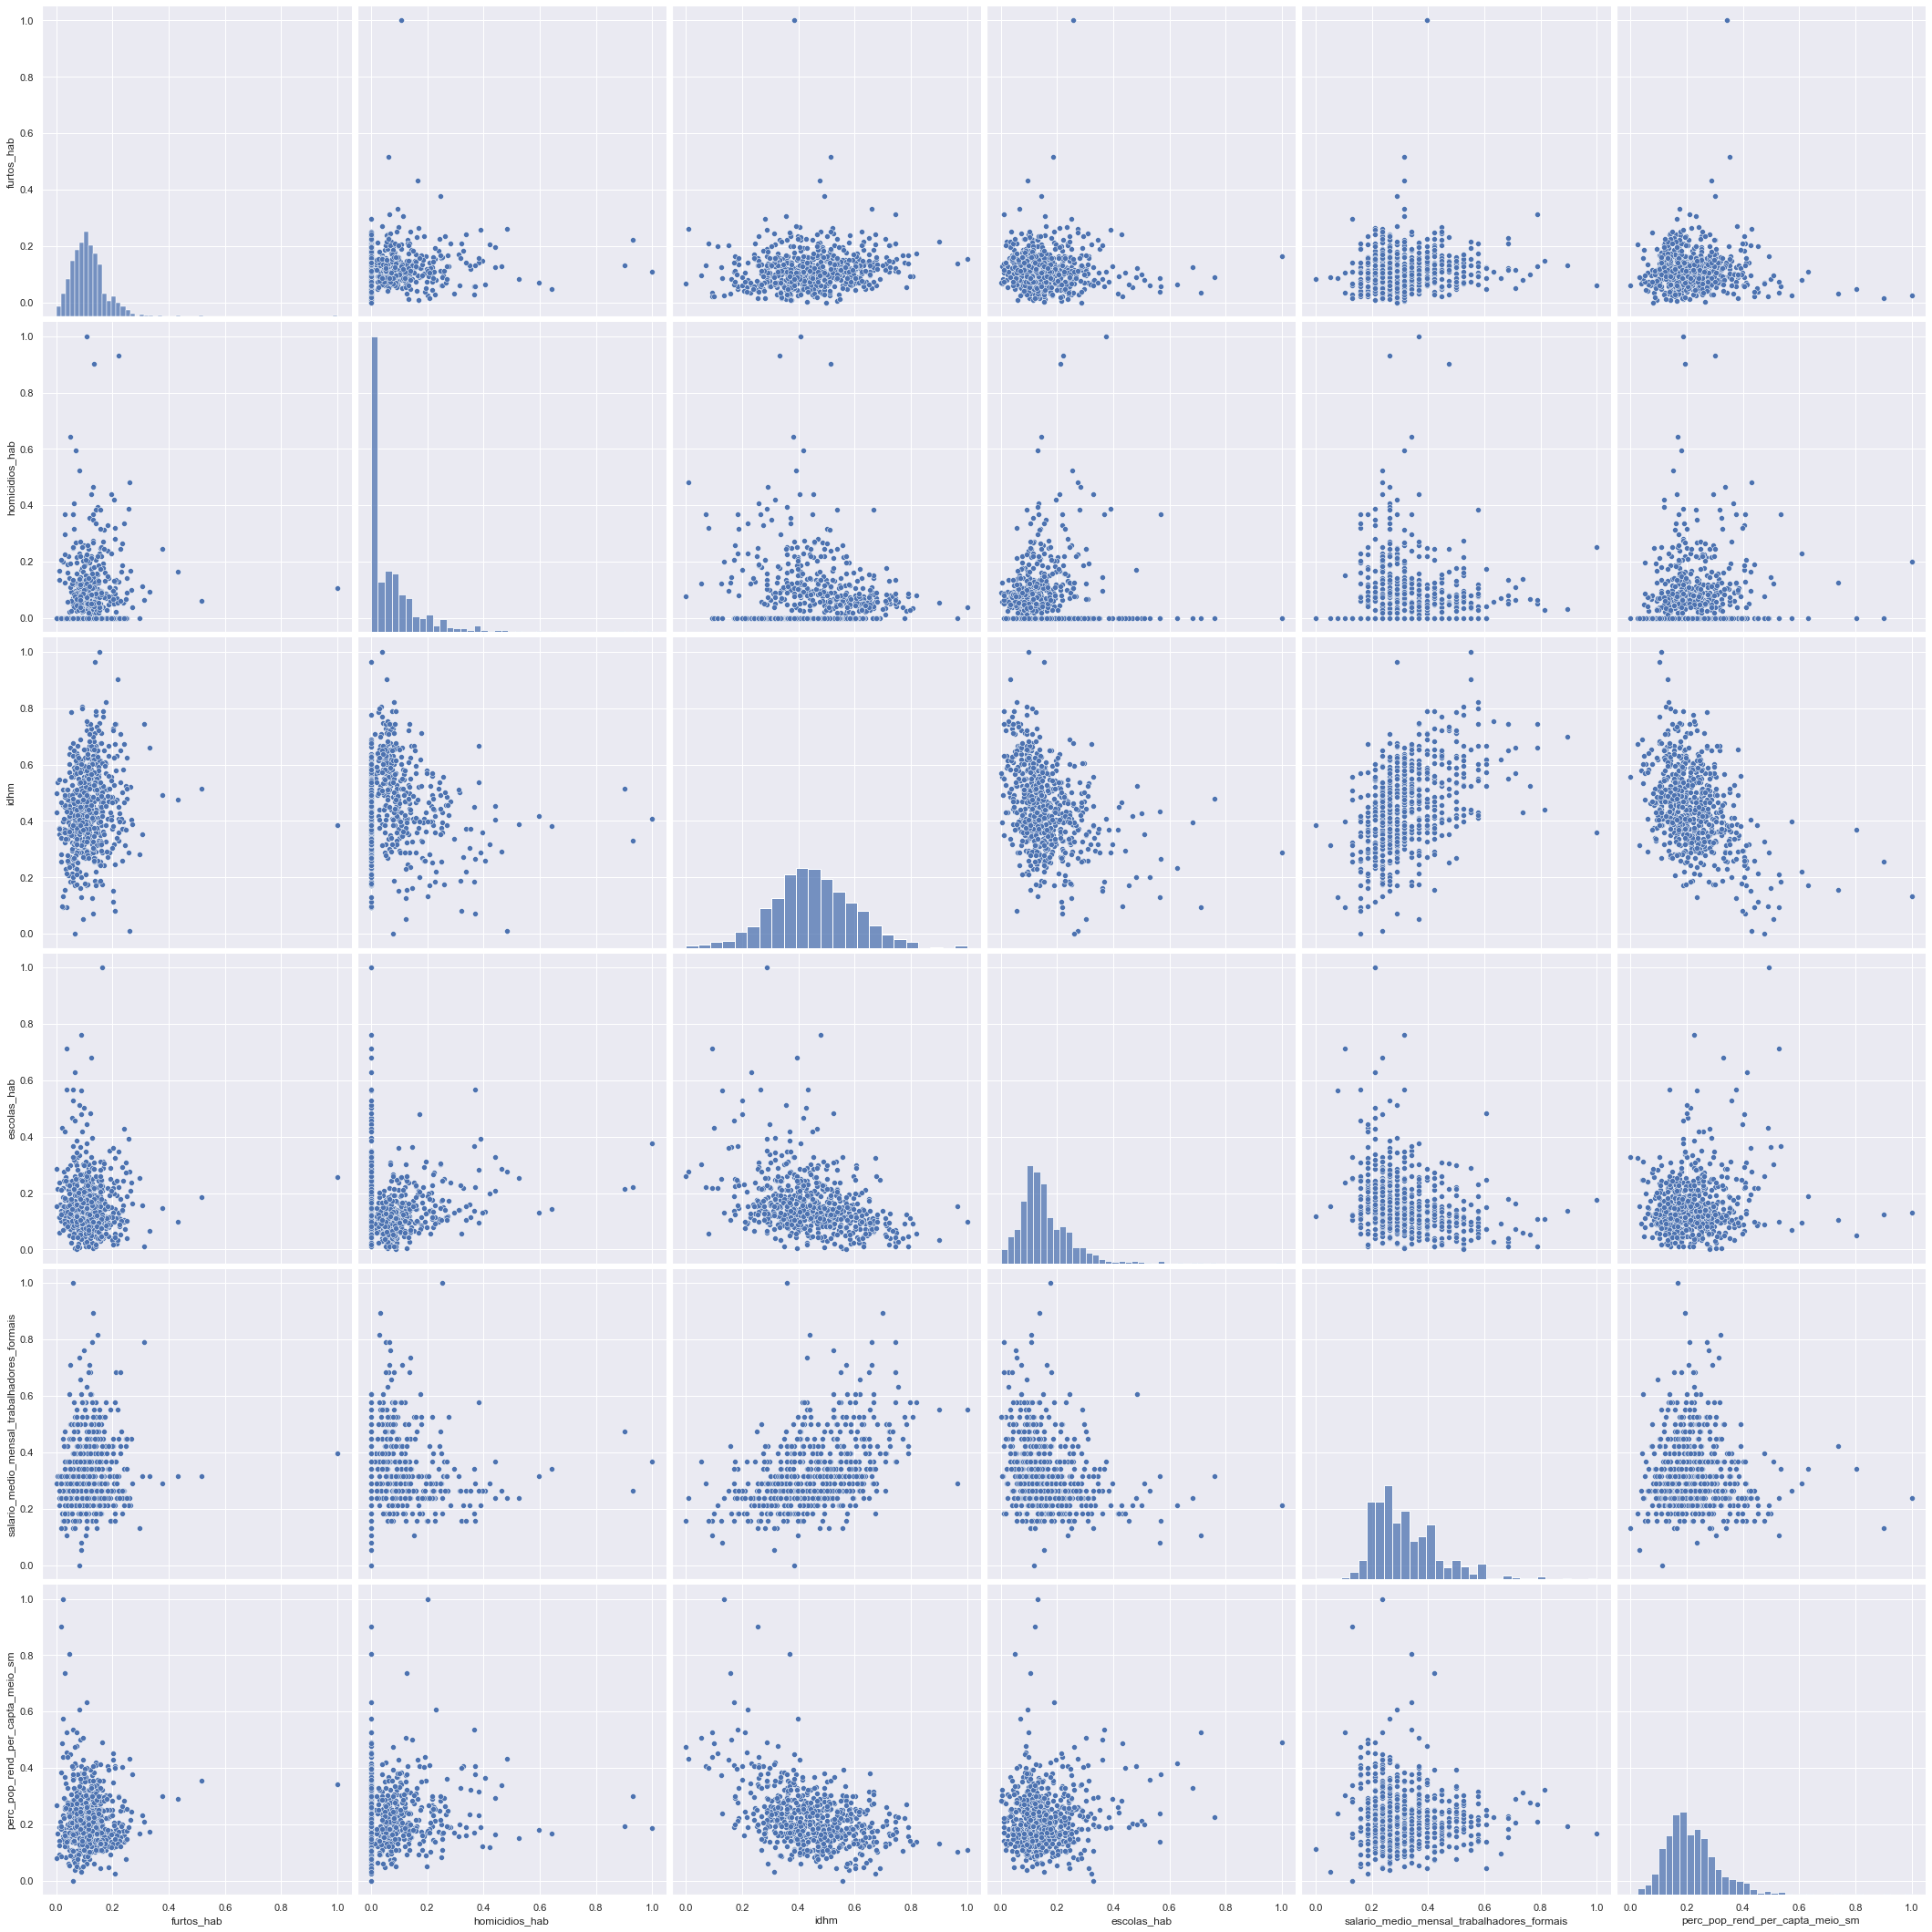

In [66]:
sns.pairplot(df[['furtos_hab', 'homicidios_hab', 'idhm', 'escolas_hab', 'salario_medio_mensal_trabalhadores_formais', 'perc_pop_rend_per_capta_meio_sm']], height=5, aspect=1)

In [99]:

cols = df.columns.to_list()

corr_pearson = df[cols_numeric].corr()
corr_spearman = df[cols_numeric].corr(method='spearman')

corr_nl = corr_spearman[['furtos_hab', 'homicidios_hab']].drop(['Furto', 'Homicidios', 'nEscolas', 'furtos_hab', 'homicidios_hab'])
corr_l = corr_pearson[['furtos_hab', 'homicidios_hab']].drop(['Furto', 'Homicidios', 'nEscolas', 'furtos_hab', 'homicidios_hab'])

corr_final = pd.merge(corr_l, corr_nl, left_index=True, right_index=True, suffixes=['_linear', '_non_linear'])

corr_final

,furtos_hab_linear,homicidios_hab_linear,furtos_hab_non_linear,homicidios_hab_non_linear
ANO_LETIVO_1,-0.006057,0.011288,-0.032268,0.008894
Alunos_Turma_1,0.156979,0.003568,0.203733,0.150622
COMUNIDADE_1,0.009597,0.029303,0.071460,0.042216
ACESSIBILIDADE_1,-0.066988,0.007425,-0.047764,-0.006280
Material_Ped_1,0.049866,0.043917,0.057743,0.034444
Equipamento_Inform_1,0.031563,0.011222,0.073688,0.016898
Lab_Inform_1,-0.001683,-0.021574,0.008334,-0.029219
Atividades_complementares_1,-0.030091,0.007085,-0.027271,-0.096434
Espacos_1,-0.046966,-0.020523,0.000379,-0.000795
Equip_1,-0.114129,-0.003454,-0.118329,-0.097334


# 3. Regression Tree

<AxesSubplot:xlabel='variable'>

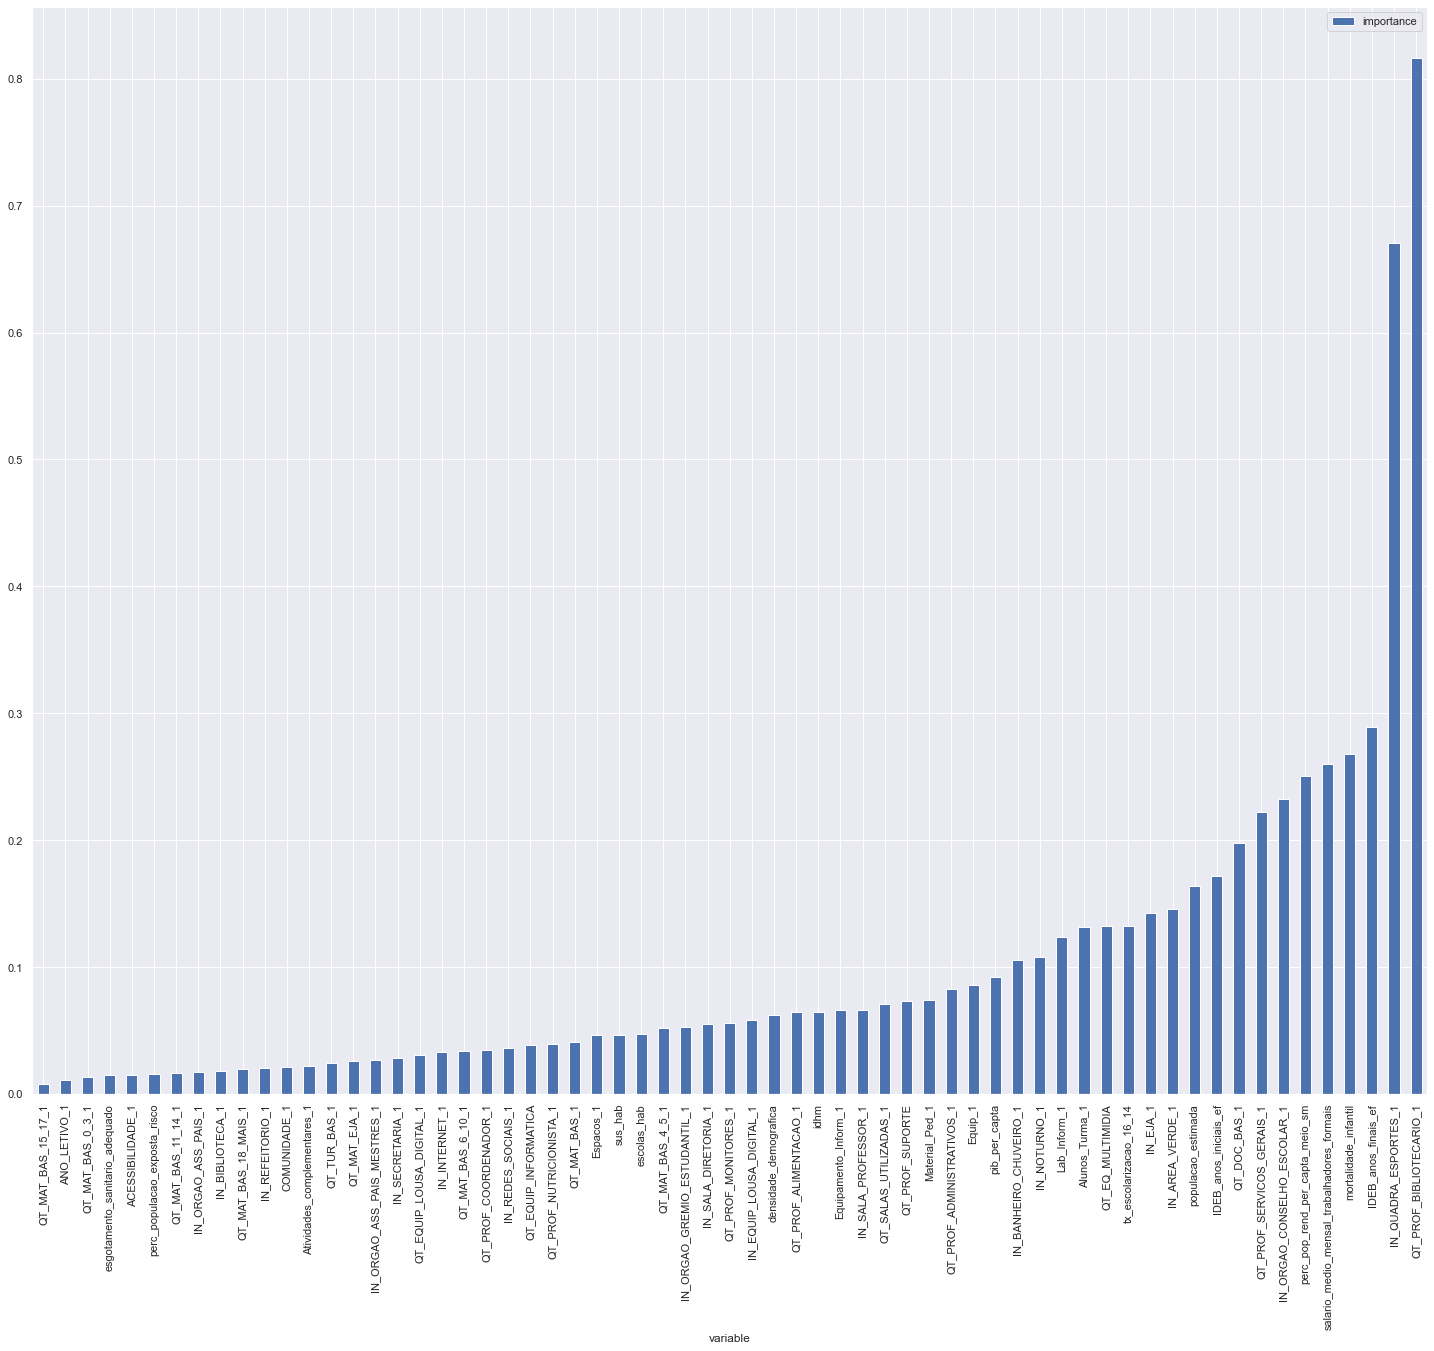

In [258]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance


model = DecisionTreeRegressor(criterion='poisson', splitter='random')

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')

model.fit(df[cols], df['furtos_hab'])

importance = model.feature_importances_

importance_perm = permutation_importance(model, df[cols], df['furtos_hab'], n_repeats=10, random_state=0)

# pd.DataFrame(importance_perm['importances_mean']).plot.bar()
importance_df = pd.DataFrame({'variable': cols, 'importance' : importance_perm['importances_mean'].tolist()})

importance_df[importance_df['importance'] > 0].sort_values(by='importance').plot.bar(x='variable', y='importance')

<AxesSubplot:xlabel='variable'>

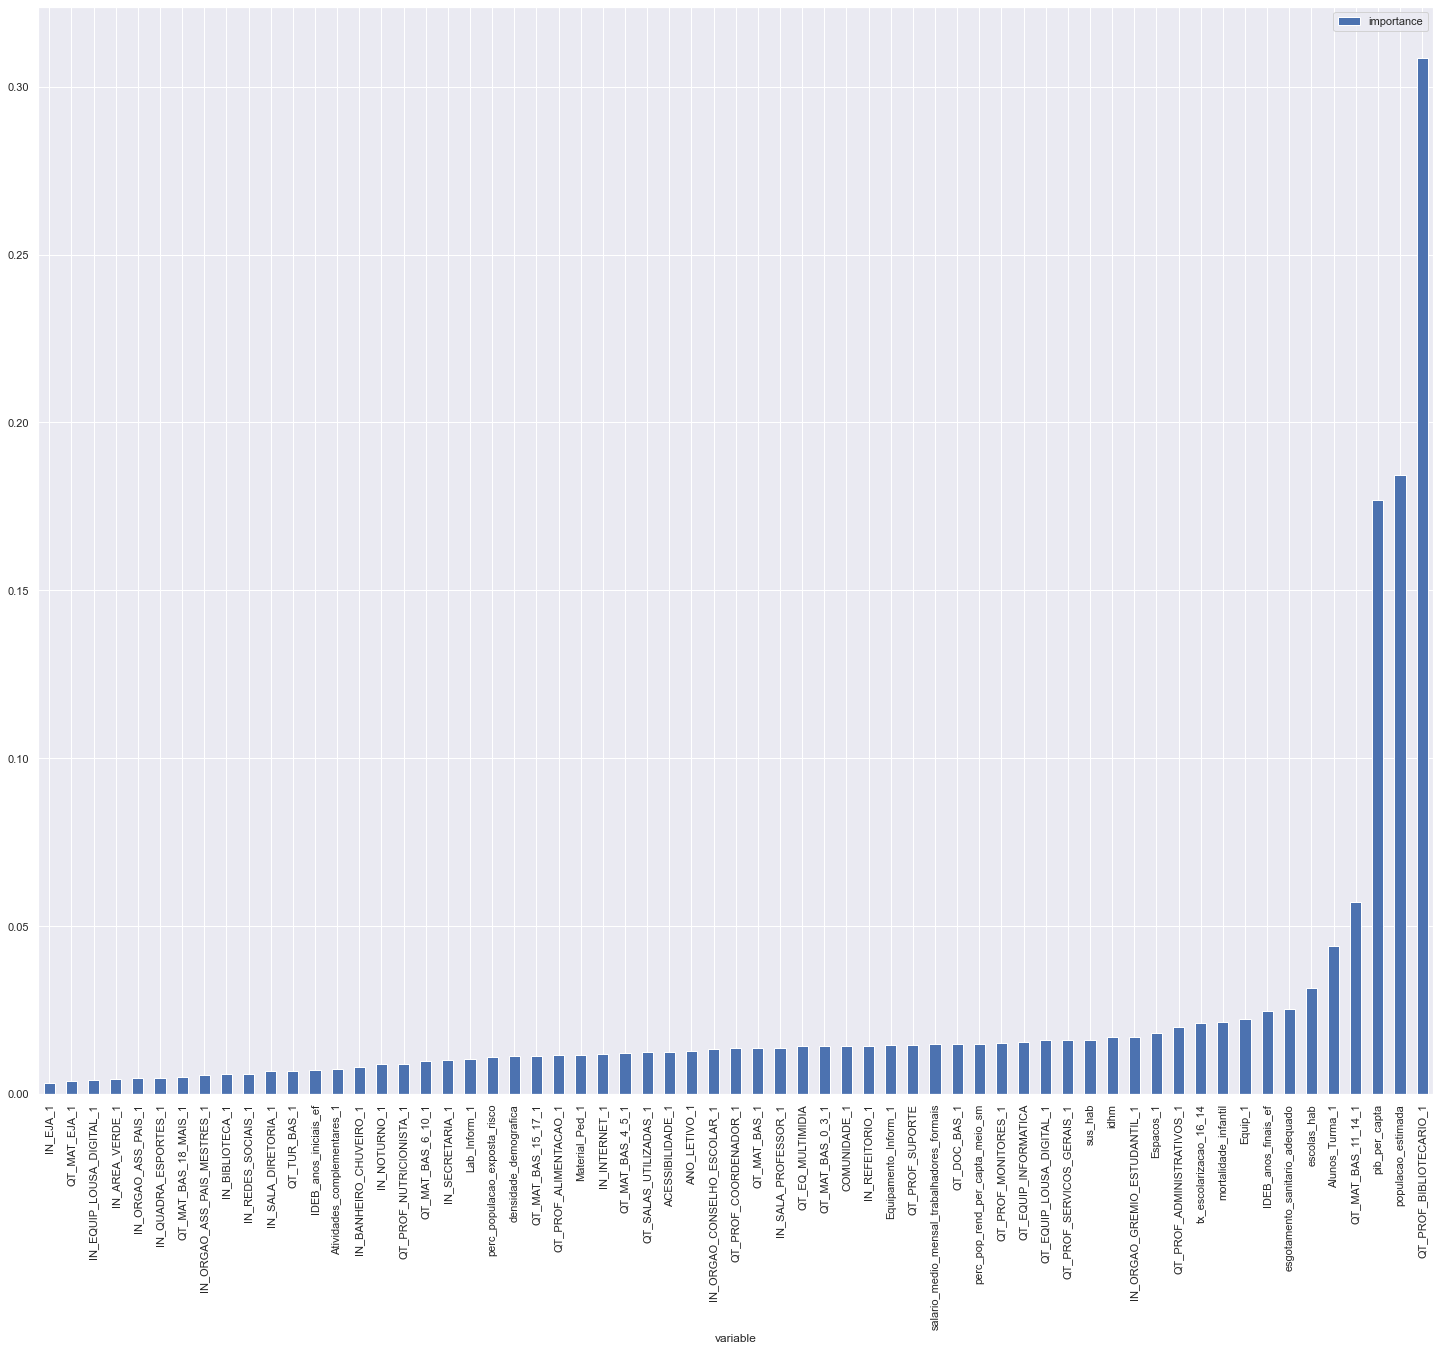

In [261]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

cols = df.columns.to_list()
cols.remove('NO_MUNICIPIO')
cols.remove('furtos_hab')
cols.remove('homicidios_hab')
cols.remove('Furto')
cols.remove('Homicidios')
cols.remove('nEscolas')

model.fit(df[cols], df['furtos_hab'])

importance_perm = permutation_importance(model, df[cols], df['furtos_hab'], n_repeats=10, random_state=0)

# pd.DataFrame(importance_perm['importances_mean']).plot.bar()
importance_df = pd.DataFrame({'variable': cols, 'importance' : importance_perm['importances_mean'].tolist()})

importance_df[importance_df['importance'] > 0].sort_values(by='importance').plot.bar(x='variable', y='importance')